<a href="https://colab.research.google.com/github/timomwa/50ForReel/blob/master/StudentNumber2_of_ITEC610_AT3_Report_and_PythonCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submission ;

UTEC610 Data processing, analysis and visualisation project

Assessment Artefact: Report and Python Code 
Weighing [40%]

# *** Instructions ***
Run the cells in order since some variables are only defined once at the higher (top) cells.





# Task 1 (10 marks)
Produce a summary statistics graph on current_weight,weight_a_year_ago, and height.
[Hint: similar to figure 1 below]
Make sure you run the code in the cells in order.

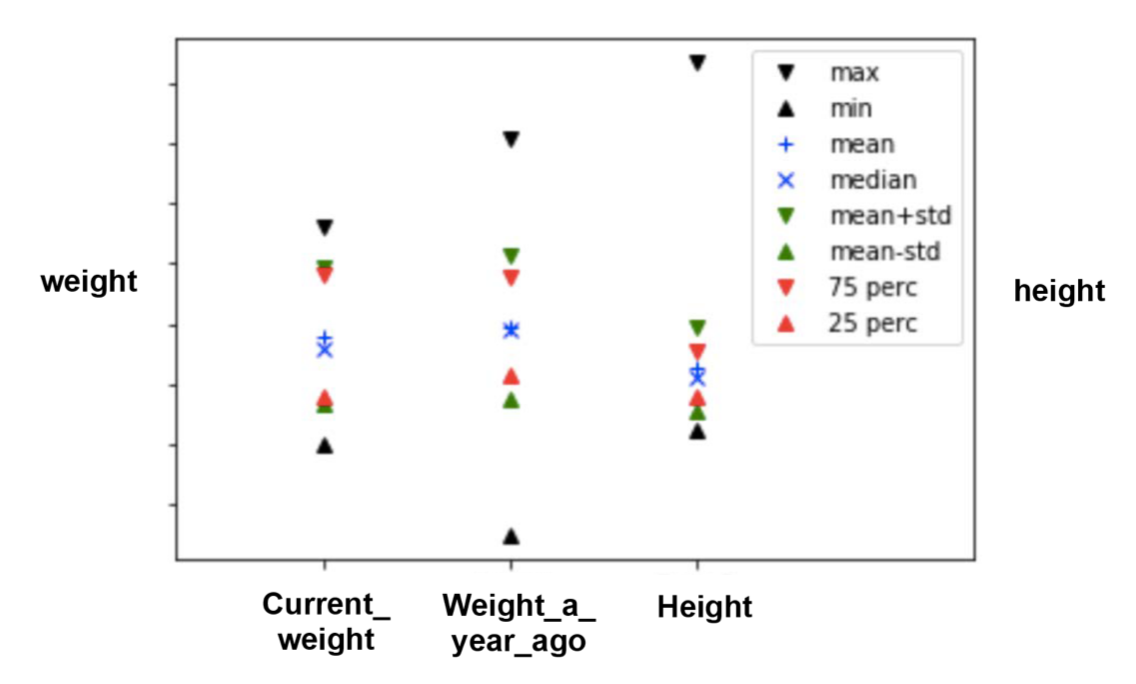

In [ ]:
#Import colab file utils
from google.colab import files as _fls
#Import Input/Output stream library so we 
#upload the data file
import io
uploaded_data_ = _fls.upload()

Saving brfss.csv to brfss (1).csv


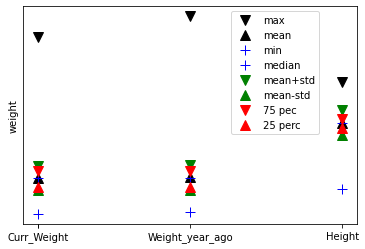

In [195]:
#Import pandas library 
import pandas as _pandas_lib
# Import native numpy library
import numpy as _numpy_lib
# Import matplot lib subclass as 2D artist for grapho
import matplotlib.patches as _mtolib_patches
# Import the matplotlib GUI generator
import matplotlib.pyplot as _matlibPlotting


_brfss_data_frame_original = _pandas_lib.read_csv(io.StringIO(uploaded_data_['brfss.csv'].decode('utf-8')))
_cur_wght_summary = _brfss_data_frame_original['wtkg2'].describe()
_prv_wght_summary = _brfss_data_frame_original['wtyrago'].describe()
_hght_summary = _brfss_data_frame_original['htm3'].describe()

#Retrueve multi-dim arrays
_max_pts = _numpy_lib.array( [_cur_wght_summary['max'], _prv_wght_summary['max'],_hght_summary['max'] ] )

_mean_points = _numpy_lib.array( [_cur_wght_summary['mean'], _prv_wght_summary['mean'],_hght_summary['mean'] ] )

_min_ponts = _numpy_lib.array( [_cur_wght_summary['min'], _prv_wght_summary['min'],_hght_summary['min'] ] )

_median_ponts = _numpy_lib.array( [_cur_wght_summary.median(), _prv_wght_summary.median(),_hght_summary.median() ] )

_mdian_and_stdDev_points = _numpy_lib.array( [(_cur_wght_summary['mean']+_cur_wght_summary['std'])
                                       , (_prv_wght_summary['mean']+_prv_wght_summary['std'])
                                       , (_hght_summary['mean']+_prv_wght_summary['std']) ] )
_medn_without_stdDev_points = _numpy_lib.array( [(_cur_wght_summary['mean']-_cur_wght_summary['std'])
                                       , (_prv_wght_summary['mean']-_prv_wght_summary['std'])
                                       , (_hght_summary['mean']-_prv_wght_summary['std']) ] )
_perc_75_ = _numpy_lib.array( [_cur_wght_summary['75%'], _prv_wght_summary['75%'],_hght_summary['75%'] ] )
_perc_25_ = _numpy_lib.array( [_cur_wght_summary['25%'], _prv_wght_summary['25%'],_hght_summary['25%'] ] )


fig, _axes = _matlibPlotting.subplots()
#Plot the chart for each

# For the 'max' data set
_matlibPlotting.plot(_max_pts,'o', marker = 'v', mec = 'k', ms = 10,  mfc = 'k', label="max")
# For the 'mean' data set 
_matlibPlotting.plot(_mean_points,'o', marker = '^', mec = 'k', ms = 10,  mfc = 'k',label="mean")
# For the min  data set
_matlibPlotting.plot(_min_ponts,'o', marker = '+', mec = 'b', ms = 10,  mfc = 'b', label="min")
# For the 'median' data set
_matlibPlotting.plot(_median_ponts,'o', marker = '+', mec = 'b', ms = 10,  mfc = 'b', label="median")
# For the 'mean+std' data set
_matlibPlotting.plot(_mdian_and_stdDev_points,'o', marker = 'v', mec = 'g', ms = 10,  mfc = 'g', label="mean+std")
# For the 'mean-std' value
_matlibPlotting.plot(_medn_without_stdDev_points,'o', marker = '^', mec = 'g', ms = 10,  mfc = 'g', label="mean-std")
# For the '75 percentile' of the data set
_matlibPlotting.plot(_perc_75_,'o', marker = 'v', mec = 'r', ms = 10,  mfc = 'r', label="75 pec")
# For the '25 percentile' of the data set
_matlibPlotting.plot(_perc_25_,'o', marker = '^', mec = 'r', ms = 10,  mfc = 'r', label="25 perc")
# Label for the Y-axis representing the 'weight'
_axes.set_ylabel('weight', rotation=90)
#Position legend as required
leg = _axes.legend(loc='upper right', bbox_to_anchor=(0.4, 0.5, 0.5, 0.5))

# Remove the visible ticks, so we're left with
# sring ticks
_axes.set_xticks([])
_axes.set_yticks([])

#Set the x-axis 
whitespace = "  "
_matlibPlotting.xticks(ticks=[0,1,2,0], labels=['Curr_Weight','Weight_year_ago', 'Height',whitespace])

_matlibPlotting.show()

# Task 2 ( 10 marks )



Define weght_change = (_curr_weight_ - ____________weight_a_year_ago____________). Calculate correlation between _wght_changeand the following variables, and determine which one is most correlated (regardless of sign of corelation) with _wght_change. Use scatter plots to support your conclution.

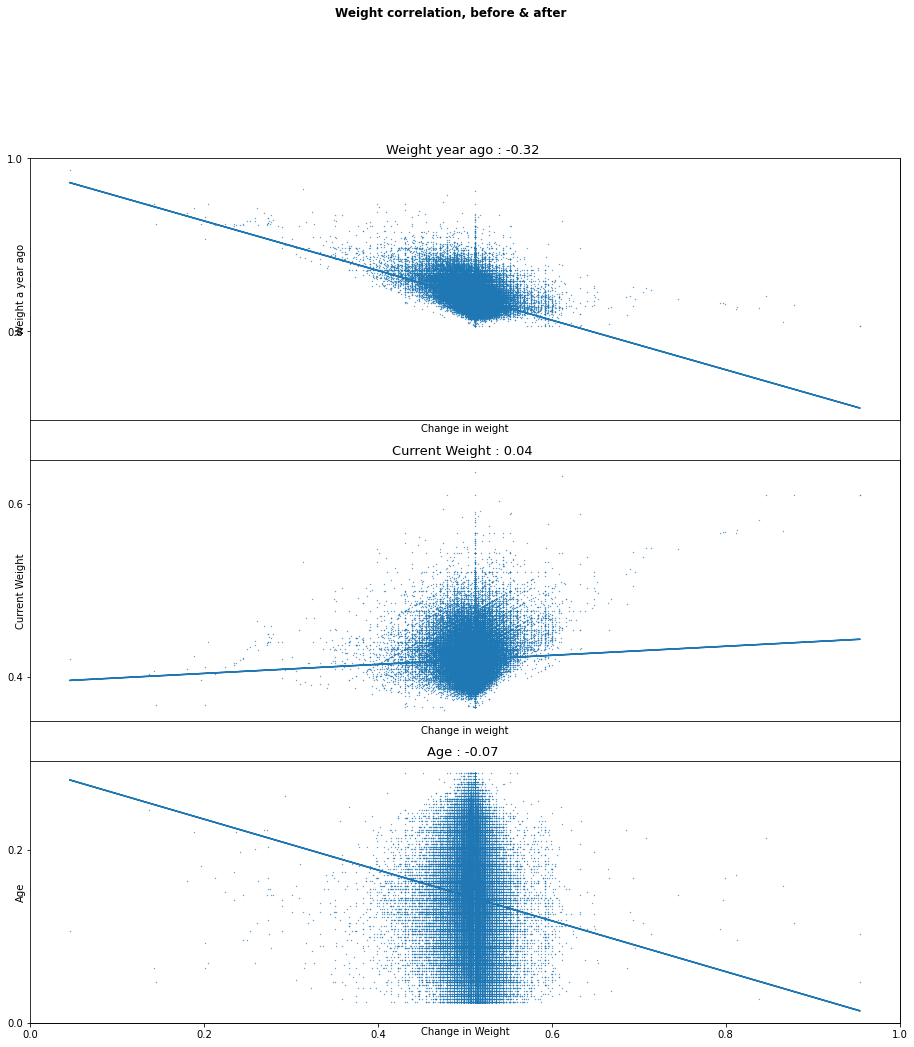

In [196]:
import pandas as _pandas_lib
import matplotlib.pyplot as _numpy_plot_artist_ref
import numpy as _numpy_lib
_data_frame2 = _pandas_lib.read_csv(io.StringIO(uploaded_data_['brfss.csv'].decode('utf-8')))


# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
_data_frame2 = _data_frame2.replace([_numpy_lib.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
# Drop insinificant groups whose value is less than 1
_data_frame2 = _data_frame2.drop(_data_frame2[_data_frame2.wtkg2 < 1].index)
_data_frame2 = _data_frame2.drop(_data_frame2[_data_frame2.wtyrago < 1].index)
_data_frame2 = _data_frame2.drop(_data_frame2[_data_frame2.age < 1].index)

figArtist, axes = _numpy_plot_artist_ref.subplots()
# Define height of plots
figArtist.set_figheight(13)
# Define width of plots
figArtist.set_figwidth(13)

# Graph Painting #1
_curr_weight_ = _data_frame2['wtkg2']
_wght_year_ag_ = _data_frame2['wtyrago']
_age = _data_frame2['age']
#Compute the difference 
_wght_change = _curr_weight_ - _wght_year_ag_
#Compute correlation

# Drawing 1: Change in weight Vs. Weight a year ago
_wght_change_corr_with_weight_year_ago =  round(_wght_change.corr( _wght_year_ag_ ),2)
x_idx_0 = _numpy_lib.array( _wght_change )
y_idx_0 =  _numpy_lib.array( _wght_year_ag_ )
ax_idx_0 = figArtist.add_subplot(3, 1, 1)
ax_idx_0.scatter(x_idx_0, y_idx_0,marker = 'o',s = 0.1)
ax_idx_0.set_title(label=("Weight year ago : %a "% (_wght_change_corr_with_weight_year_ago) ),
          pad='5.0', fontsize=13,)
ax_idx_0.set_ylabel(ylabel='Weight a year ago')
ax_idx_0.set_yticks([])
ax_idx_0.set_xlabel(xlabel='Change in weight')
ax_idx_0.set_xticks([])
a_idx_0, b_idx_0 = _numpy_lib.polyfit(x_idx_0,y_idx_0, 1)
ax_idx_0.plot(x_idx_0, a_idx_0*x_idx_0+b_idx_0)# Polynomial 1

# Drawing 2: Change in Weight vs Curent Weight
# Derive our ticker values
_wght_change_corr_with_curr_weight = round(_wght_change.corr( _curr_weight_ ),2)
x_idx_1 = _numpy_lib.array( _wght_change)
y_idx_1 = _numpy_lib.array( _curr_weight_ )
ax_idx_1 = figArtist.add_subplot(3, 1, 2)
ax_idx_1.scatter(x_idx_1,y_idx_1, marker = 'o', s = 0.1)
ax_idx_1.set_title("Current Weight Vs Change in weight" )
ax_idx_1.set_title(label=("Current Weight : %a "% (_wght_change_corr_with_curr_weight) ),
          fontsize=13,pad='5.0')
ax_idx_1.set_ylabel(ylabel='Current Weight')
ax_idx_1.set_yticks([])
ax_idx_1.set_xlabel(xlabel='Change in weight')
ax_idx_1.set_xticks([])
# find line of best fit
a_idx_1, b_idx_1 = _numpy_lib.polyfit(x_idx_1,y_idx_1,1)
ax_idx_1.plot(x_idx_1, a_idx_1*x_idx_1+b_idx_1)


# Plot 3: Change in weight Vs Age
_wght_change_corr_with_age =  round(_wght_change.corr( _age ),2)
# Derive the ticker values for plot 3
x_idx_2 =  _numpy_lib.array(  _wght_change )
y_idx_2 = _numpy_lib.array( _age  )
ax_idx_2 = figArtist.add_subplot(3,1,3)
ax_idx_2.scatter(x_idx_2,y_idx_2,s = 0.1, marker = 'o')
ax_idx_2.set_title(label=("Age : %a "% (_wght_change_corr_with_age) ),
          pad='5.0',fontsize=13)
ax_idx_2.set_ylabel(ylabel='Age')
ax_idx_2.set_yticks([])
ax_idx_2.set_xlabel(xlabel='Change in Weight')
ax_idx_2.set_xticks([])
a_idx_2, b_idx_2 = _numpy_lib.polyfit(x_idx_2,y_idx_2, 1)
ax_idx_2.plot(x_idx_2, a_idx_2*x_idx_2+b_idx_2)# Plot correlation line in graph

#Add Super title
_numpy_plot_artist_ref.suptitle("Weight correlation, before & after",size=12, y=1.13, fontweight='bold')
_numpy_plot_artist_ref.tight_layout()
_numpy_plot_artist_ref.show()

Both **Weight a year ago** and **age** have strong (albeit negative) correlation to the individual's **current weight**. With **Weight a year ago** having the stronget correlation with it's value closest to unsigned 1, i.e -0.32

# Task 3 ( 5 marks )

Use *t-test* to check significant difference;

## Task 3.1 ( 1 mark )

Use u-test to test whether there is a significant difference between the **_wght_change** of male and female.

In [ ]:
import pandas as _pandas_lib
from scipy.stats import mannwhitneyu
_fresh_data_frame = _pandas_lib.read_csv(io.StringIO(uploaded_data_['brfss.csv'].decode('utf-8')))
# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
_fresh_data_frame = _fresh_data_frame.replace([np.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
_fresh_data_frame = _fresh_data_frame.drop(_fresh_data_frame[_fresh_data_frame.wtkg2 < 1].index)
_fresh_data_frame = _fresh_data_frame.drop(_fresh_data_frame[_fresh_data_frame.wtyrago < 1].index)
_fresh_data_frame = _fresh_data_frame.drop(_fresh_data_frame[_fresh_data_frame.age < 1].index)

_females_sub_data_frame = _fresh_data_frame.query("sex == 1",inplace=False)
_males_sub_data_frame = _fresh_data_frame.query("sex == 2",inplace=False)

_females_curr_weight = _females_sub_data_frame['wtkg2']
_females_wght_year_ago = _females_sub_data_frame['wtyrago']

_males_curr_weight = _males_sub_data_frame['wtkg2']
_males_weght_year_ago = _males_sub_data_frame['wtyrago']

_female_difference = _females_curr_weight - _females_wght_year_ago
_male_difference = _males_curr_weight - _males_weght_year_ago

mannwhitneyu(  _female_difference.values,  _male_difference.values)


MannwhitneyuResult(statistic=17461784252.5, pvalue=7.272211862849254e-38)

With a p-value less than 0.05, i.e 7.272211862849254e-38, there's a significance difference in male and female weight differences.

## Task 3.2 ( 1 mark )

Randomly split the subjects into two groups of roughly equal sizes, and use t-test to test whether ther is a significant difference between the _wght_change of the two groups.

In [ ]:
import pandas as _pandas_lib_
from scipy.stats import mannwhitneyu
import numpy as np
_fresh_dataFrame2 = _pandas_lib_.read_csv(io.StringIO(uploaded_data_['brfss.csv'].decode('utf-8')))
# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
_fresh_dataFrame2 = _fresh_dataFrame2.replace([np.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
_fresh_dataFrame2 = _fresh_dataFrame2.drop(_fresh_dataFrame2[_fresh_dataFrame2.wtkg2 < 1].index)
_fresh_dataFrame2 = _fresh_dataFrame2.drop(_fresh_dataFrame2[_fresh_dataFrame2.wtyrago < 1].index)
_fresh_dataFrame2 = _fresh_dataFrame2.drop(_fresh_dataFrame2[_fresh_dataFrame2.age < 1].index)

#Split into two random groups

# Grp 1
dataFrame_1 = _fresh_dataFrame2.sample(n=10000, replace=True) 
dataFrame_2 = _fresh_dataFrame2.sample(n=11020, replace=True)

# Grm 1 Wght diff
group_1_current_weight = dataFrame_1['wtkg2']
group_1_wgt_yr_ago = dataFrame_1['wtyrago']
group_1_wgt_change = group_1_current_weight - group_1_wgt_yr_ago

# Group 2 Weight differences
_grp_2_curr_weight = dataFrame_2['wtkg2']
_grp_2_wght_a_year_ago = dataFrame_2['wtyrago']
_grp_2_wght_change = _grp_2_curr_weight - _grp_2_wght_a_year_ago

uTestResult = mannwhitneyu(group_1_wgt_change.values, grp_2_weight_change.values)
print(uTestResult)

MannwhitneyuResult(statistic=54974921.5, pvalue=0.3879144865545122)


Between two random groups, there's no significant as indicated by the p-test because p values are greater than 0.05.

## Task 3.3 ( 1 mark )

Repeat the process in 3.2 1000 times and plot the distributions of the -log10(p-value) of the test results.

\[Hint: the x-axis is the number of experiments from 1 to 1000, and the y-axis is log10(p-value). There should be two disttributions: One for each group. Use seaborn.displot method.\]

What can you say about the difference between male in terms of their _wght_change?

Consider both the p-value and the absolute differences between the two means.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


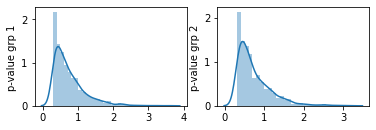

In [190]:
from scipy.stats import mannwhitneyu
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *


_fresh_dataframe3 = _pandas_lib.read_csv(io.StringIO(uploaded_data_['brfss.csv'].decode('utf-8')))
# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
_fresh_dataframe3 = _fresh_dataframe3.replace([np.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
_fresh_dataframe3 = _fresh_dataframe3.drop(_fresh_dataframe3[_fresh_dataframe3.wtkg2 < 1].index)
_fresh_dataframe3 = _fresh_dataframe3.drop(_fresh_dataframe3[_fresh_dataframe3.wtyrago < 1].index)
_fresh_dataframe3 = _fresh_dataframe3.drop(_fresh_dataframe3[_fresh_dataframe3.age < 1].index)

pvalue_grp_1 = np.array([])
pvalue_grp_2 = np.array([])
x_axis = np.array([])
male_df = _fresh_dataframe3.query("sex == 1", inplace=False)
female_df = _fresh_dataframe3.query("sex == 2", inplace=False)
z = 1000#A thousand points in the plots
x = z
count = 0
# we loop 1000x
while x != 0:
  x_axis = np.append(x_axis, x)
  x -= 1
  # Group 1
  df_1_male = male_df.sample(n=10000, replace=True) 
  df_1_female = female_df.sample(n=10000, replace=True) 
  
  #Group 2
  df_2_male = male_df.sample(n=11020, replace=True)
  df_2_female = female_df.sample(n=11020, replace=True)

  # Group 1 Weight difference
  grp_1_current_weight_male = df_1_male['wtkg2']
  grp_1_weight_a_year_ago_male = df_1_male['wtyrago']
  grp_1_weight_change_male = grp_1_current_weight_male - grp_1_weight_a_year_ago_male

  grp_1_current_weight_female = df_1_female['wtkg2']
  grp_1_weight_a_year_ago_female = df_1_female['wtyrago']
  grp_1_weight_change_female = grp_1_current_weight_female - grp_1_weight_a_year_ago_female

  # Group 2 Weight differences
  grp_2_current_weight_male = df_2_male['wtkg2']
  grp_2_weight_a_year_ago_male = df_2_male['wtyrago']
  grp_2_weight_change_male = grp_2_current_weight_male - grp_2_weight_a_year_ago_male

  grp_2_current_weight_female = df_2_female['wtkg2']
  grp_2_weight_a_year_ago_female = df_2_female['wtyrago']
  grp_2_weight_change_female = grp_2_current_weight_female - grp_2_weight_a_year_ago_female

  utest_result_1 = mannwhitneyu(grp_1_weight_change_male.values, grp_2_weight_change_male.values)
  utest_result_2 = mannwhitneyu(grp_1_weight_change_female.values, grp_2_weight_change_female.values)


  log10_pvalue_1 = math.log10(utest_result_1.pvalue) 
  log10_pvalue_1 = abs(log10_pvalue_1)
  pvalue_grp_1 = np.append(pvalue_grp_1, log10_pvalue_1)

  log10_pvalue_2 = math.log10(utest_result_2.pvalue) 
  log10_pvalue_2 = abs(log10_pvalue_2)
  pvalue_grp_2 = np.append(pvalue_grp_2, log10_pvalue_2)


#sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
subplot(2,2,1)
ax = sns.distplot(pvalue_grp_1)
ax.set_ylabel(ylabel="p-value grp 1 ")
subplot(2,2,2)
ax2 = sns.distplot(pvalue_grp_2)
ax2.set_ylabel(ylabel="p-value grp 2 ")

plt.show()

## Task 3.4 ( 1 mark )

Define weight_height_ratio as current_weight/height. Use t-test to test whether there is a significant difference between the weight_height_ratio of male and female.


In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import pandas as _pandas_lib2

_fresh_dataframe3 = _pandas_lib2.read_csv(io.StringIO(uploaded_data_['brfss.csv'].decode('utf-8')))
# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
_fresh_dataframe3 = _fresh_dataframe3.replace([np.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
_fresh_dataframe3 = _fresh_dataframe3.drop(_fresh_dataframe3[_fresh_dataframe3.wtkg2 < 1].index)
_fresh_dataframe3 = _fresh_dataframe3.drop(_fresh_dataframe3[_fresh_dataframe3.wtyrago < 1].index)
_fresh_dataframe3 = _fresh_dataframe3.drop(_fresh_dataframe3[_fresh_dataframe3.age < 1].index)

_new_female_df = _fresh_dataframe3.query("sex == 2", inplace=False)
_new_male_df = _fresh_dataframe3.query("sex == 1", inplace=False)

_curr_wght_female = _new_female_df['wtkg2']
_curr_hght_female = _new_female_df['htm3']
_wgt_hgt_ratio_feml = _curr_wght_female/ _curr_hght_female

_curr_wght_male = _new_male_df['wtkg2']
_curr_height_male = _new_male_df['htm3']
_wght_hght_ratio_male = _curr_wght_male/ _curr_height_male


mannwhitneyu(_wght_hght_ratio_male.values, _wgt_hgt_ratio_feml.values)

MannwhitneyuResult(statistic=11498277864.5, pvalue=0.0)

No significant differences amongst the male and female ratios, since the result of p value is zero.

## Task 3.5 ( 1 mark )

Also, repeat the anlysis you did in 3.4, but replace weight_height_ratio with weight_change in your analysys.

In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

import pandas as _pandas_lib3

_fresh_dataframe4 = _pandas_lib3.read_csv(io.StringIO(uploaded_data_['brfss.csv'].decode('utf-8')))
# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
_fresh_dataframe4 = _fresh_dataframe4.replace([np.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
_fresh_dataframe4 = _fresh_dataframe4.drop(_fresh_dataframe4[_fresh_dataframe4.wtkg2 < 1].index)
_fresh_dataframe4 = _fresh_dataframe4.drop(_fresh_dataframe4[_fresh_dataframe4.wtyrago < 1].index)
_fresh_dataframe4 = _fresh_dataframe4.drop(_fresh_dataframe4[_fresh_dataframe4.age < 1].index)
_female_dataFrame = _fresh_dataframe4.query("sex == 2", inplace=False)
_male_dataFrame_ = _fresh_dataframe4.query("sex == 1", inplace=False)

_curr_weight_male = _male_dataFrame_['wtkg2']
_wght_yr_ago_male = _male_dataFrame_['wtyrago']
_wght_change_male = _curr_weight_male-_wght_yr_ago_male

_curr_wght_female_ = _female_dataFrame['wtkg2']
_wght_yr_ago_female_ = _female_dataFrame['wtyrago']
_wght_change_male_ = _curr_wght_female_-_wght_yr_ago_female_

mannwhitneyu(_wght_change_male.values, _wght_change_male_.values)

MannwhitneyuResult(statistic=17461784252.5, pvalue=7.272211862849254e-38)

Theres a significant difference (as indicated by a p-value of 7.2 - greater than 0.05) between the male and female weight changes a year ago.

# Task 4 ( 15 marks )


### ***Section 1: summary statistics analysis***
In terms of numerical value, the mean value for 'current_weight' and 'weight_a_year_ago' sems to have minimal differences.

The mean+std combined for both 'current_weight' and 'weight_a_year_ago' have minimum differences, meaning, the majoriy of the data set participants didn't have a significant weight change within a year.


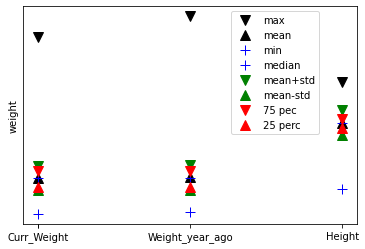


### ***Section 2: correlation analysis***
In this section, describe the foruma you used to calculate the correlation in your code and present the numbers and scatter plots you obtain for the correlations between weight change and the three factors mentioned

in task 2. Then do a quick comparison for the three factors.


 ##### Formula used

[Task 2, Cell](https://colab.research.google.com/drive/1YxPVzESRcPgSjGrP5ly4UgICVF-chBAN#scrollTo=3UQJX-v7KWOw&line=3&uniqifier=1) shows 


```
# Graph Painting #1
_curr_weight_ = _data_frame2['wtkg2']
_wght_year_ag_ = _data_frame2['wtyrago']
_age = _data_frame2['age']

#Calc differences 
_wght_change = _curr_weight_ - _wght_year_ag_

#Calc Corr
# First Change in wght Vs. Wght  year ago
_wght_change_corr_with_weight_year_ago =  round(_wght_change.corr( _wght_year_ag_ ),2)
```

The columns ***'wtyrago'***, ***'wtkg2'***, ***'age'*** extracted as follows;
```
_curr_weight_ = _data_frame2['wtkg2']
_wght_year_ag_ = _data_frame2['wtyrago']
_age = _data_frame2['age']
```

Get the differences of the two sets
```
_wght_change = _curr_weight_ - _wght_year_ag_
```

Get correlation form the frames by invoking inbuilt function - DataFrame.corr(...)

```
_wght_change_corr_with_weight_year_ago =  round(_wght_change.corr( _wght_year_ag_ ),2)
```

#### Comparison of the three factors

The tree factors, current_weight, weight_year_ago & age relate to the weight change as follows;

current_weight has a positive correlation to weight change with a value of 0.04

weight_year_ago has a negative correlation to weight change with a value of -0.32

age has a negative correlation to weight change with a value of -0.07

weight_year_ago has the strongest correlation to weight change with it's value as -0.32

### ***Section 3: Significant difference analysis***
In this section, summarize the results you obtain for each task in Task 3;

Between male and female weight, there's a significant difference denoted by a p-value of 7.272211862849254e-38,
With a p-value less than 0.05, i.e 7.272211862849254e-38.

*Q:* What can you say about the difference between male in terms of their weight_change?

*A:* 
A p-value of 0.2 indicates a well distributed curve meaning mostly significant differences between the two data sets.

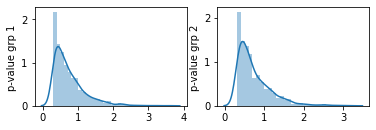




### ***Section 4: Conclusion***
Total rows: 410,856 with 7 columns. Of the 7 columns the first serves as the row index.
Data summary shows average current weight of 79.75 in comparison to previous period's average of 79.01, and a stadard deviation in both weight (20.56 and 19.5.
Most of the 50% percentile average figures differ by very little, meaning most of the population virtually had no weight change.
The youngest participant in the sample was 20 years while the oldest had 99 years.
The whole data set shows an average age of 54 years while the 50% perc show 55 years. This is just a 1 year difference, making the group in this percentile have almost identical weight.
Most participants had an average height of 168 cm, the tallest being 236 cm and zero for the shortest.
Most obese individual has a recent weight of 300kgs and the heviest individual was at 342 kgs recorded in the prior year.



In [197]:
df.describe()

,Unnamed: 0,age,weight2,wtyrago,wtkg2,htm3,sex
count,388162.000000,388162.000000,388162.000000,388162.000000,388162.000000,388162.000000,388162.000000
mean,207016.372412,54.850485,79.016389,79.758497,79.016503,168.060743,1.611477
std,119709.798646,16.716071,19.507493,20.568305,19.507437,16.353345,0.487415
min,0.000000,18.000000,20.000000,22.727273,20.000000,0.000000,1.000000
25%,103227.250000,43.000000,64.545455,64.545455,64.550000,160.000000,1.000000
50%,206755.500000,55.000000,77.272727,77.272727,77.270000,168.000000,2.000000
75%,310652.750000,67.000000,90.909091,90.909091,90.910000,178.000000,2.000000
max,414506.000000,99.000000,300.000000,342.272727,300.000000,236.000000,2.000000
